In [ ]:
# Mineria de Datos
# Diana Ximena de Leon Figueroa
# Carne 18607

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Carga del dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [ ]:
# Exploracion de datos

In [3]:
len(df)

348

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.1 KB


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


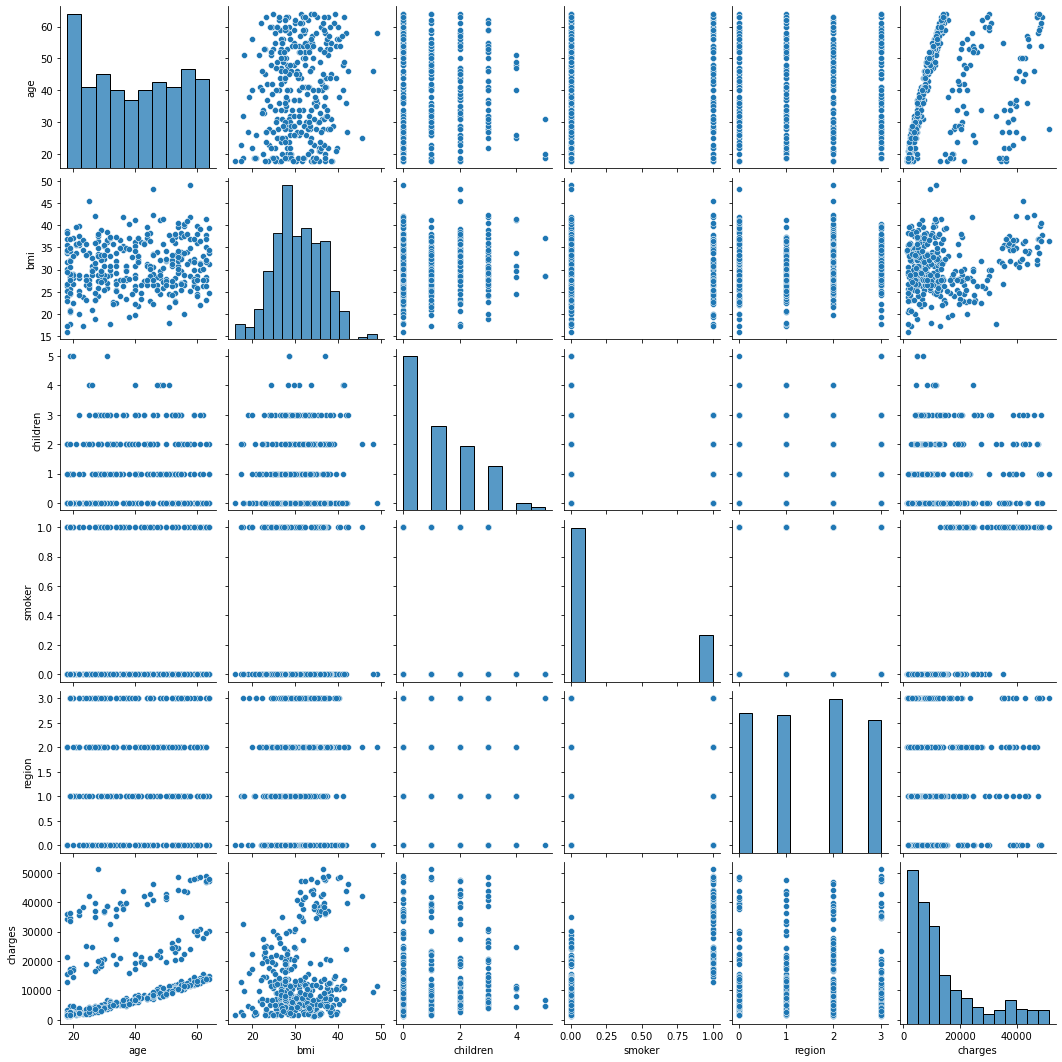

In [7]:
sns.pairplot(df[['age','bmi','children','smoker','region','charges']])
plt.show()

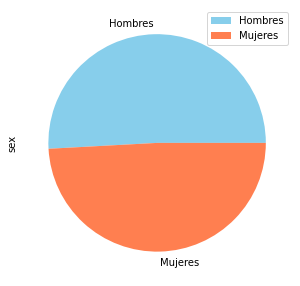

In [8]:
plt.figure(figsize=(5, 5))
df.sex.value_counts().plot(kind='pie', labels=["Hombres","Mujeres"], colors=["skyblue", "coral"])
plt.legend()
plt.show()

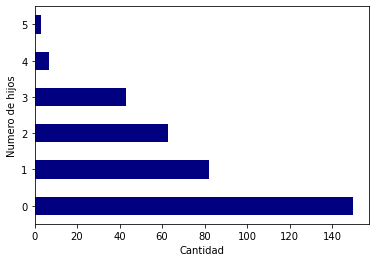

In [9]:
df.children.value_counts().plot(kind="barh",color="navy")
plt.xlabel("Cantidad")
plt.ylabel("Numero de hijos")
plt.show()

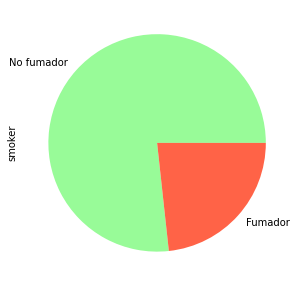

In [10]:
plt.figure(figsize=(5, 5))
df.smoker.value_counts().plot(kind='pie', labels=["No fumador","Fumador"], colors=["palegreen", "tomato"])
plt.show()

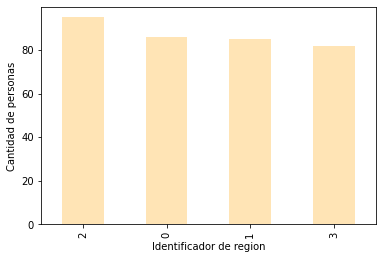

In [11]:
df.region.value_counts().plot(kind='bar',color='moccasin')
plt.xlabel("Identificador de region")
plt.ylabel("Cantidad de personas")
plt.show()

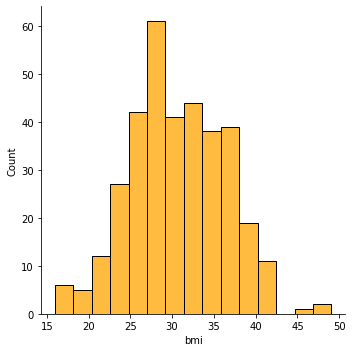

In [12]:
sns.displot(df["bmi"], color="orange")
plt.show()

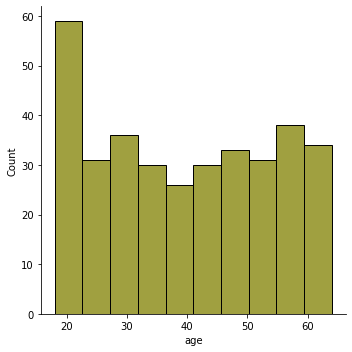

In [13]:
sns.displot(df["age"], color="olive")
plt.show()

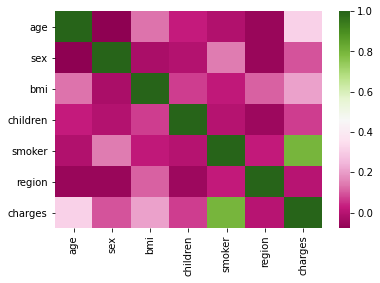

In [14]:
sns.heatmap(df.corr(),cmap='PiYG')
plt.show()

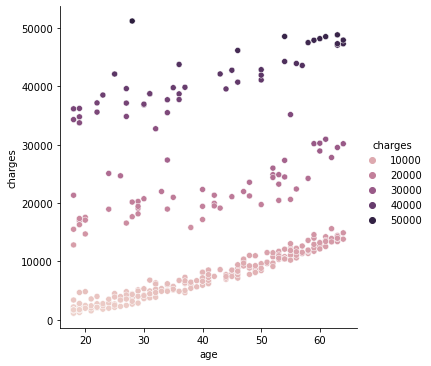

In [15]:
sns.relplot(data=df,x="age",y="charges",hue="charges")
plt.show()

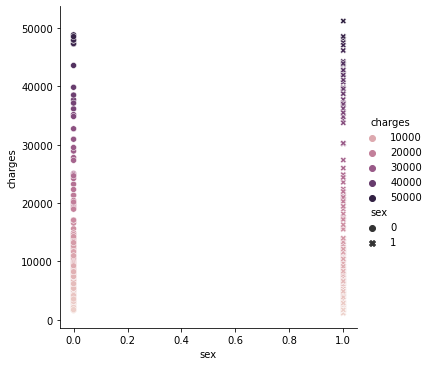

In [16]:
sns.relplot(data=df,x="sex",y="charges",hue="charges",style="sex")
plt.show()

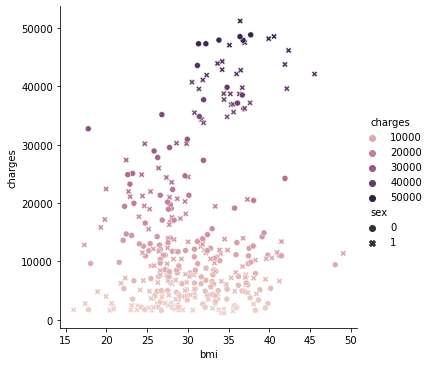

In [17]:
sns.relplot(data=df,x="bmi",y='charges',hue="charges",style="sex")
plt.show()

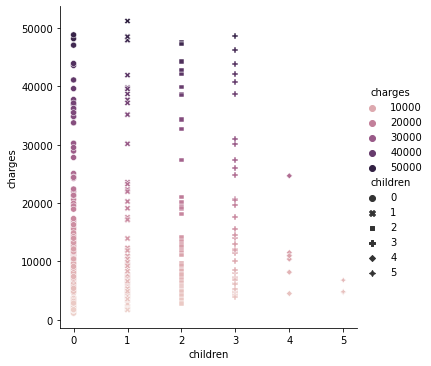

In [18]:
sns.relplot(data=df,x="children",y="charges",hue="charges",style="children")
plt.show()

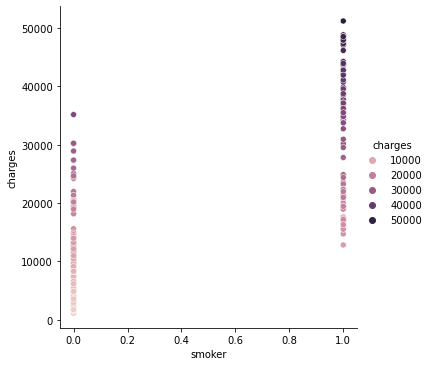

In [19]:
sns.relplot(data=df,x="smoker",y="charges",hue="charges")
plt.show()

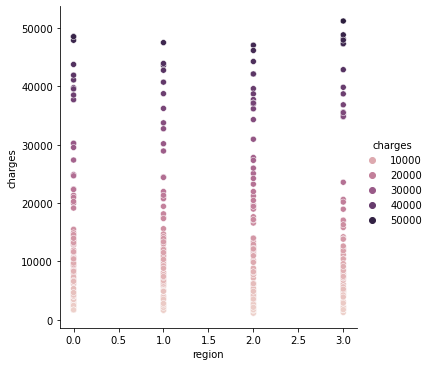

In [20]:
sns.relplot(data=df,x='region',y='charges',hue='charges')
plt.show()

In [ ]:
# Preparacion de los datos faltantes

In [21]:
df.isnull().sum().sum()

0

In [ ]:
# No hay valores nulos, por tanto no hace falta realizar los siguientes pasos

In [ ]:
# Preparación de los datos categoricos

In [22]:
df["sex"] = df["sex"].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker         int64
region         int64
charges      float64
dtype: object

In [23]:
df["smoker"] = df["smoker"].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region         int64
charges      float64
dtype: object

In [24]:
df["sex"] = df["sex"].cat.codes

In [25]:
df["smoker"] = df["smoker"].cat.codes

In [26]:
df = pd.get_dummies(df, columns=["region"])

In [ ]:
# Dividir en training y test y preparacion de los datos a escala

In [27]:
target=df['charges']

In [28]:
data=np.array(df['bmi'])
data=data.reshape(len(df), 1)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()
data=sc.fit_transform(data)

In [31]:
from sklearn.model_selection import train_test_split

In [ ]:
# Obtenemos un train y test data por cada modelo

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data, target, test_size=.3)

In [33]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data, target, test_size=.3)

In [34]:
x_train2p, x_test2p, y_train2p, y_test2p = train_test_split(data, target, test_size=.3)

In [35]:
print(x_train1, y_train1)

[[ 2.88984922e-01]
 [-7.25654153e-01]
 [-7.76386107e-01]
 [-8.44028712e-01]
 [-4.71994384e-01]
 [ 2.19746394e-02]
 [ 6.61019250e-01]
 [-9.37482311e-01]
 [ 5.38194520e-01]
 [ 3.97753249e-02]
 [-3.36709174e-01]
 [ 1.68633874e+00]
 [-7.93296758e-01]
 [-1.74029323e+00]
 [-5.39636989e-01]
 [ 3.73538179e-01]
 [ 1.87858614e+00]
 [-7.42564804e-01]
 [-2.61964709e+00]
 [ 1.01881303e+00]
 [ 2.72074271e-01]
 [-7.25654153e-01]
 [ 4.13589721e-01]
 [ 1.64380124e-01]
 [-9.57063065e-01]
 [-1.30061630e+00]
 [-1.13506992e+00]
 [-4.38173082e-01]
 [ 1.31430441e+00]
 [ 2.17782180e-01]
 [ 9.48500322e-01]
 [-4.87124967e-01]
 [-1.93413656e-01]
 [-1.84513313e-01]
 [ 4.75002086e-01]
 [ 1.19681988e+00]
 [-1.73832902e-01]
 [ 7.45572507e-01]
 [ 1.92130779e+00]
 [ 1.03305358e+00]
 [ 2.21342317e-01]
 [-3.19798523e-01]
 [-1.50692010e-01]
 [-1.32909739e+00]
 [-3.36709174e-01]
 [ 1.15142814e+00]
 [-1.09412834e+00]
 [ 1.06687488e+00]
 [-8.48294738e-02]
 [ 4.75002086e-01]
 [-5.47647298e-01]
 [ 6.10287296e-01]
 [ 1.2877875

In [ ]:
# Modelacion Lineal

In [ ]:
# Modelo 1

In [36]:
n = x_train1.shape[1]
r = np.linalg.matrix_rank(x_train1)
print(n, r)

1 1


In [37]:
U, sigma, VT = np.linalg.svd(x_train1, full_matrices=False)
print(sigma, VT)

[15.68143555] [[1.]]


In [38]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))
print(D_plus)

[[0.06376967]]


In [39]:
V = VT.T

In [40]:
X_plus = V.dot(D_plus).dot(U.T)

In [41]:
w = X_plus.dot(y_train1)

In [42]:
print("El coeficiente del modelo 1 es de: ", w)

El coeficiente del modelo 1 es de:  [3067.00313448]


In [43]:
error = np.linalg.norm(x_train1.dot(w) - y_train1, ord=2) ** 2

In [ ]:
# Modelo 2

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
lr.fit(x_train2, y_train2)

LinearRegression()

In [46]:
w2 = lr.coef_[0]
print("El coeficiente del modelo 2 es de: ", w2)

El coeficiente del modelo 2 es de:  2963.425255496102


In [ ]:
# Modelo 3

In [47]:
target_m=df['charges']
data_m=df.drop(columns=['charges'])

In [ ]:
# Volmemos a escala la nueva data

In [48]:
data_m=sc.fit_transform(data_m)

In [ ]:
# Nuevo training y test

In [49]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(data_m, target_m, test_size=.3)

In [50]:
x_train3p, x_test3p, y_train3p, y_test3p = train_test_split(data_m, target_m, test_size=.3)

In [51]:
print(x_train3, y_train3)

[[-0.80520451  0.98290472  1.31430441 ... -0.56850147  1.63191847
  -0.55522129]
 [-0.18004325 -1.01739261 -0.52272634 ...  1.75901042 -0.61277571
  -0.55522129]
 [ 1.62597816 -1.01739261 -0.52272634 ... -0.56850147 -0.61277571
  -0.55522129]
 ...
 [-0.11058089  0.98290472  1.13451749 ... -0.56850147 -0.61277571
  -0.55522129]
 [ 1.20920399  0.98290472  0.59337665 ...  1.75901042 -0.61277571
  -0.55522129]
 [ 1.34812871 -1.01739261 -0.52628648 ... -0.56850147  1.63191847
  -0.55522129]] 226     2689.49540
7       7281.50560
244    29523.16560
332    13429.03540
97     10226.28420
          ...     
294     3906.12700
325     6600.20595
44      6079.67150
75     11356.66090
25     14001.13380
Name: charges, Length: 243, dtype: float64


In [52]:
lr_m = LinearRegression()
lr_m.fit(x_train3, y_train3)

LinearRegression()

In [53]:
w3 = lr_m.coef_
print("El coeficiente del modelo 3 es de: ", w3)

El coeficiente del modelo 3 es de:  [ 3.76667991e+03 -3.91488815e+02  1.86024252e+03  9.33594565e+02
  9.92577767e+03 -3.91962573e+17 -3.90420008e+17 -4.04824503e+17
 -3.85649234e+17]


In [ ]:
# Evaluacion de los modelos

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Modelo 1

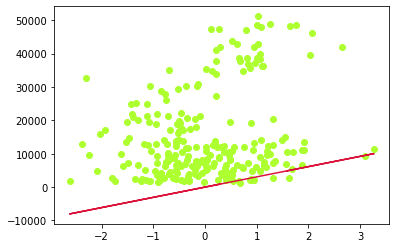

In [55]:
plt.scatter(x_train1, y_train1, color="greenyellow")
plt.plot(x_train1, w*x_train1, c='crimson')

In [56]:
print("Mean Squared Error:")
print(mean_squared_error(lr.predict(x_train1), y_train1))

Mean Squared Error:
158016495.3606868


In [57]:
print("Root Mean Squared Error:")
print(r2_score(lr.predict(x_train1), y_train1))

Root Mean Squared Error:
-16.78577482636666


In [58]:
print("Mean Absolute Error:")
print(mean_absolute_error(lr.predict(x_train1), y_train1))

Mean Absolute Error:
10253.455661684853


In [59]:
print("Mean Squared Error:")
print(mean_squared_error(lr.predict(x_test1),y_test1))

Mean Squared Error:
139553659.41151282


In [60]:
print("Root Mean Squared Error:")
print(r2_score(lr.predict(x_test1),y_test1))

Root Mean Squared Error:
-15.369608367269834


In [61]:
print("Mean Absolute Error:")
print(mean_absolute_error(lr.predict(x_test1), y_test1))

Mean Absolute Error:
9582.552871991762


In [ ]:
# Modelo 2

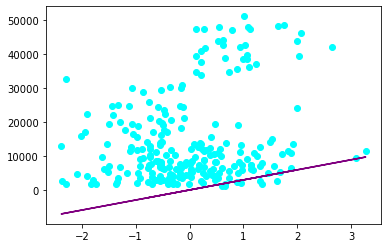

In [62]:
plt.scatter(x_train2, y_train2, color="aqua")
plt.plot(x_train2, w2 * x_train2, c='purple')

In [63]:
print("Mean Squared Error:")
print(mean_squared_error(lr.predict(x_train2), y_train2))

Mean Squared Error:
155842724.16536006


In [64]:
print("Root Mean Squared Error:")
print(r2_score(lr.predict(x_train2), y_train2))

Root Mean Squared Error:
-16.223550546273596


In [65]:
print("Mean Absolute Error:")
print(mean_absolute_error(lr.predict(x_train2), y_train2))

Mean Absolute Error:
10123.134278011834


In [66]:
print("Mean Squared Error:")
print(mean_squared_error(lr.predict(x_test2), y_test2))

Mean Squared Error:
144584387.03498328


In [67]:
print("Root Mean Squared Error:")
print(r2_score(lr.predict(x_test2), y_test2))

Root Mean Squared Error:
-16.706771918400776


In [68]:
print("Mean Absolute Error:")
print(mean_absolute_error(lr.predict(x_test2), y_test2))

Mean Absolute Error:
9884.153788492182


In [ ]:
# Modelo 3

In [69]:
print("Mean Squared Error:")
print(mean_squared_error(lr_m.predict(x_train3), y_train3))

Mean Squared Error:
37518262.39325177


In [70]:
print("Root Mean Squared Error:")
print(r2_score(lr_m.predict(x_train3), y_train3))

Root Mean Squared Error:
0.6635842574663888


In [71]:
print("Mean Absolute Error:")
print(mean_absolute_error(lr_m.predict(x_train3), y_train3))

Mean Absolute Error:
4307.0730511913835


In [72]:
print("Mean Squared Error:")
print(mean_squared_error(lr_m.predict(x_test3), y_test3))

Mean Squared Error:
35528793.97121346


In [73]:
print("Root Mean Squared Error:")
print(r2_score(lr_m.predict(x_test3), y_test3))

Root Mean Squared Error:
0.7292529671406112


In [74]:
print("Mean Absolute Error:")
print(mean_absolute_error(lr_m.predict(x_test3), y_test3))

Mean Absolute Error:
4154.915146822654


In [ ]:
# Calculo de los p-values

In [75]:
import statsmodels.api as sm

In [76]:
X = sm.add_constant(data)
model = sm.OLS(target, X).fit()
print(model.f_test(np.identity(2)))

<F test: F=array([[231.21394677]]), p=1.730700678342307e-64, df_denom=346, df_num=2>


In [78]:
print(model.tvalues)

const    21.129536
x1        3.996322
dtype: float64


In [79]:
print(model.f_pvalue)

7.864833152570032e-05


In [80]:
model3 = sm.OLS(target_m, data_m).fit()
print(model3.f_test(np.identity(9)))

<F test: F=array([[22.49431708]]), p=1.576833179032862e-27, df_denom=340, df_num=8>


c:\users\diana\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [82]:
print(model3.tvalues)

x1     4.553801
x2     0.109466
x3     2.360649
x4     0.790326
x5    12.052941
x6     0.255966
x7     0.296320
x8    -0.786972
x9     0.248792
dtype: float64


In [83]:
print(model3.f_pvalue)

1.576833179032862e-27


In [ ]:
# Regresion Polinomial

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# Modelo 2

In [85]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train2p, y_train2p)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

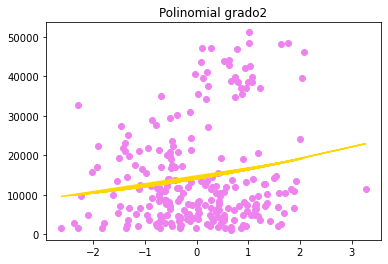

In [86]:
plt.figure()
plt.scatter(x_train2p, y_train2p, color="violet")
plt.plot(x_train2p,polyreg.predict(x_train2p), color="gold")
plt.title("Polinomial grado"+str(degree))
plt.show()

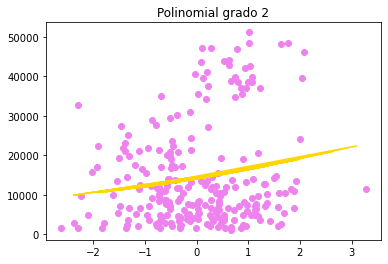

In [87]:
plt.figure()
plt.scatter(x_train2p, y_train2p, color="violet")
plt.plot(x_test2p, polyreg.predict(x_test2p), color="gold")
plt.title("Polinomial grado "+str(degree))
plt.show()

In [88]:
print("Mean Squared Error:")
print(mean_squared_error(polyreg.predict(x_train2p),y_train2p))

Mean Squared Error:
156019049.23249876


In [89]:
print("Root Mean Squared Error:")
print(r2_score(polyreg.predict(x_train2p), y_train2p))

Root Mean Squared Error:
-32.38181971740501


In [90]:
print("Mean Absolute Error:")
print(mean_absolute_error(polyreg.predict(x_train2p), y_train2p))

Mean Absolute Error:
10057.507927772716


In [91]:
print("Mean Squared Error:")
print(mean_squared_error(polyreg.predict(x_test2p), y_test2p))

Mean Squared Error:
144126754.3602239


In [92]:
print("Root Mean Squared Error:")
print(r2_score(polyreg.predict(x_test2p), y_test2p))

Root Mean Squared Error:
-27.804458243963015


In [93]:
print("Mean Absolute Error:")
print(mean_absolute_error(polyreg.predict(x_test2p), y_test2p))

Mean Absolute Error:
9682.203275560027


In [ ]:
# Modelo 3

In [94]:
polyreg3 = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg3.fit(x_train3p, y_train3p)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [95]:
print("Mean Squared Error:")
print(mean_squared_error(polyreg3.predict(x_train3p),y_train3p))

Mean Squared Error:
17993954.122793414


In [96]:
print("Root Mean Squared Error:")
print(r2_score(polyreg3.predict(x_train3p), y_train3p))

Root Mean Squared Error:
0.8765153322026382


In [97]:
print("Mean Absolute Error:")
print(mean_absolute_error(polyreg3.predict(x_train3p), y_train3p))

Mean Absolute Error:
2658.0169309465023


In [98]:
print("Mean Squared Error:")
print(mean_squared_error(polyreg3.predict(x_test3p), y_test3p))

Mean Squared Error:
35733328.43473269


In [99]:
print("Root Mean Squared Error:")
print(r2_score(polyreg3.predict(x_test3p), y_test3p))

Root Mean Squared Error:
0.7109437965425134


In [100]:
print("Mean Absolute Error:")
print(mean_absolute_error(polyreg3.predict(x_test3p), y_test3p))

Mean Absolute Error:
4029.005901333334


In [ ]:
# Referencias
# https://towardsdatascience.com/least-squares-linear-regression-in-python-54b87fc49e77
# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
# https://towardsdatascience.com/logistic-regression-model-fitting-and-finding-the-correlation-p-value-z-score-confidence-8330fb86db19